<a href="https://colab.research.google.com/github/jda-21/AI4ENG/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UDEA/ai4eng 20252

Exploratory Data Analysis (EDA) - `train.csv`
Revisión y análisis general de datos.

In [1]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

print("Data: ", df.shape)
df.head()

Saving train.csv to train.csv
Data:  (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [76]:
cols = df.columns
df[cols].nunique()

,0
ID,692500
PERIODO_ACADEMICO,9
E_PRGM_ACADEMICO,948
E_PRGM_DEPARTAMENTO,31
E_VALORMATRICULAUNIVERSIDAD,8
E_HORASSEMANATRABAJA,5
F_ESTRATOVIVIENDA,7
F_TIENEINTERNET,2
F_EDUCACIONPADRE,12
F_TIENELAVADORA,2


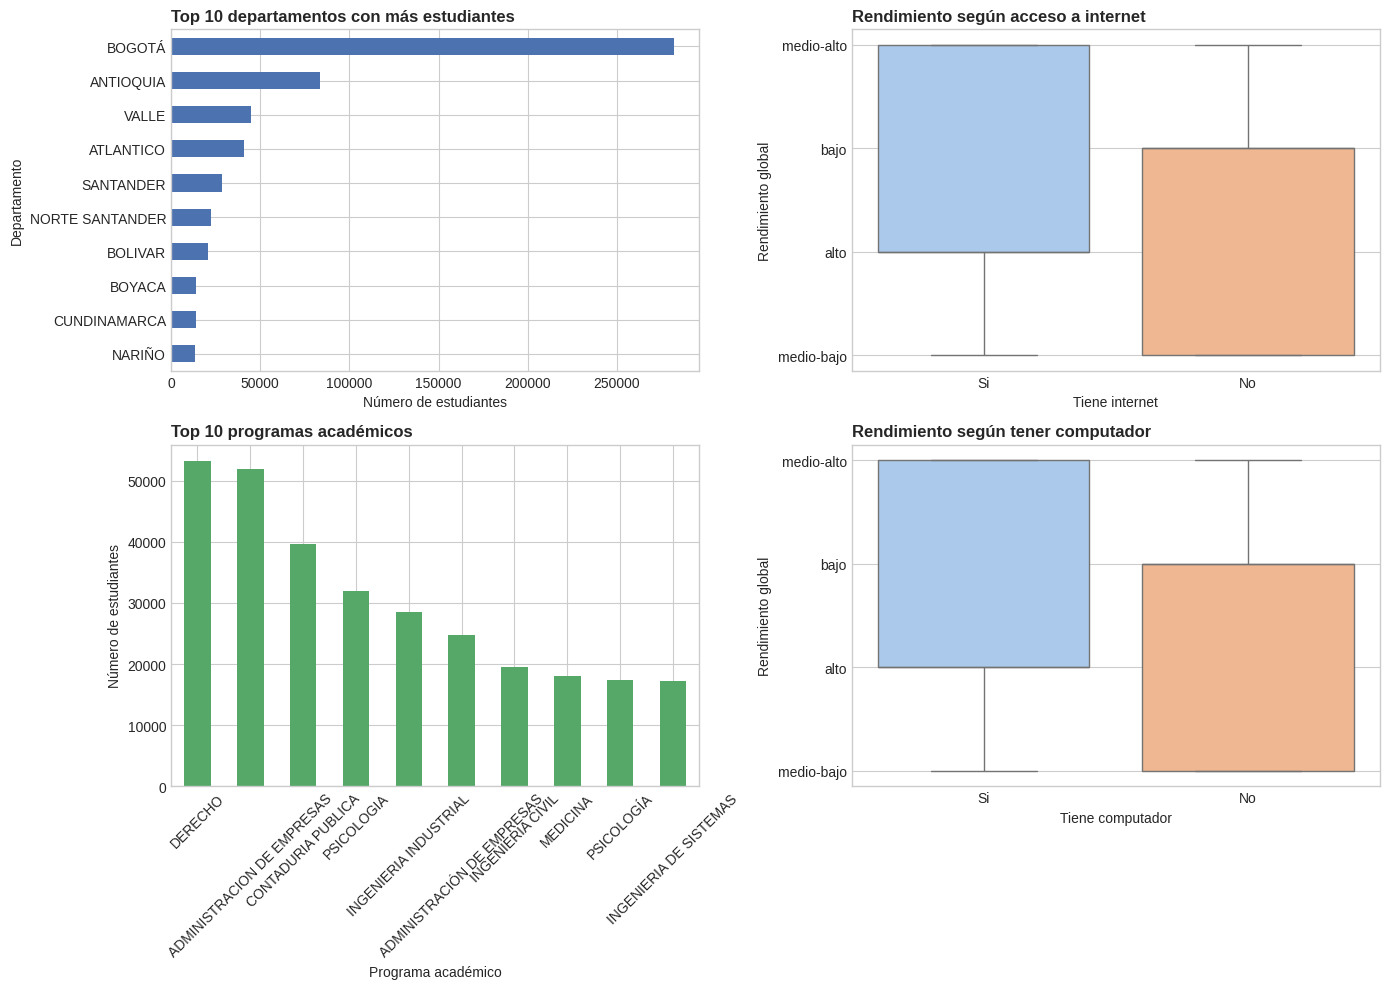

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

df['E_PRGM_DEPARTAMENTO'].value_counts().head(10).plot(
    kind='barh', ax=axes[0,0], color="#4C72B0"
)
axes[0,0].set_title('Top 10 departamentos con más estudiantes', loc='left', fontsize=12, fontweight='bold')
axes[0,0].invert_yaxis()
axes[0,0].set_xlabel('Número de estudiantes')
axes[0,0].set_ylabel('Departamento')

df['E_PRGM_ACADEMICO'].value_counts().head(10).plot(
    kind='bar', ax=axes[1,0], color="#55A868"
)
axes[1,0].set_title('Top 10 programas académicos', loc='left', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Programa académico')
axes[1,0].set_ylabel('Número de estudiantes')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(
    x='F_TIENEINTERNET',
    y='RENDIMIENTO_GLOBAL',
    data=df,
    ax=axes[0,1],
    hue='F_TIENEINTERNET',
    palette="pastel",
    legend=False
)
axes[0,1].set_title('Rendimiento según acceso a internet', loc='left', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Tiene internet')
axes[0,1].set_ylabel('Rendimiento global')

sns.boxplot(
    x='F_TIENECOMPUTADOR',
    y='RENDIMIENTO_GLOBAL',
    data=df,
    ax=axes[1,1],
    hue='F_TIENECOMPUTADOR',
    palette="pastel",
    legend=False
)
axes[1,1].set_title('Rendimiento según tener computador', loc='left', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Tiene computador')
axes[1,1].set_ylabel('Rendimiento global')

plt.tight_layout()
plt.show()


In [36]:
mapa_horas = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

df['E_HORASSEMANATRABAJA_NUM'] = (df['E_HORASSEMANATRABAJA'].map(mapa_horas).fillna(0).astype(int))
df['E_HORASSEMANATRABAJA_NUM'].unique()

array([1, 0, 4, 3, 2])

In [69]:
map_educacion = {
    'ninguno': 0, 'no aplica': 0, 'no sabe': 0,
    'primaria incompleta': 1, 'primaria completa': 1,
    'secundaria (bachillerato) incompleta': 2,
    'secundaria (bachillerato) completa': 3,
    'técnica o tecnológica incompleta': 4, 'tecnica o tecnológica incompleta': 4,
    'técnica o tecnológica completa': 5, 'tecnica o tecnológica completa': 5,
    'educación profesional incompleta': 6, 'educacion profesional incompleta': 6,
    'educación profesional completa': 7, 'educacion profesional completa': 7,
    'postgrado': 8
}

df['F_EDUCACIONPADRE_NUM'] = (
    df['F_EDUCACIONPADRE']
      .astype(str).str.strip().str.lower()
      .map(map_educacion)
      .fillna(0)
      .astype(int)
)

df['F_EDUCACIONMADRE_NUM'] = (
    df['F_EDUCACIONMADRE']
      .astype(str).str.strip().str.lower()
      .map(map_educacion)
      .fillna(0)
      .astype(int)
)

df['F_EDUCACIONPADRE_NUM'].unique()

array([4, 5, 3, 0, 1, 7, 6, 8, 2])

In [72]:
df['RENDIMIENTO_GLOBAL'].unique()

array([2, 0, 3, 1])

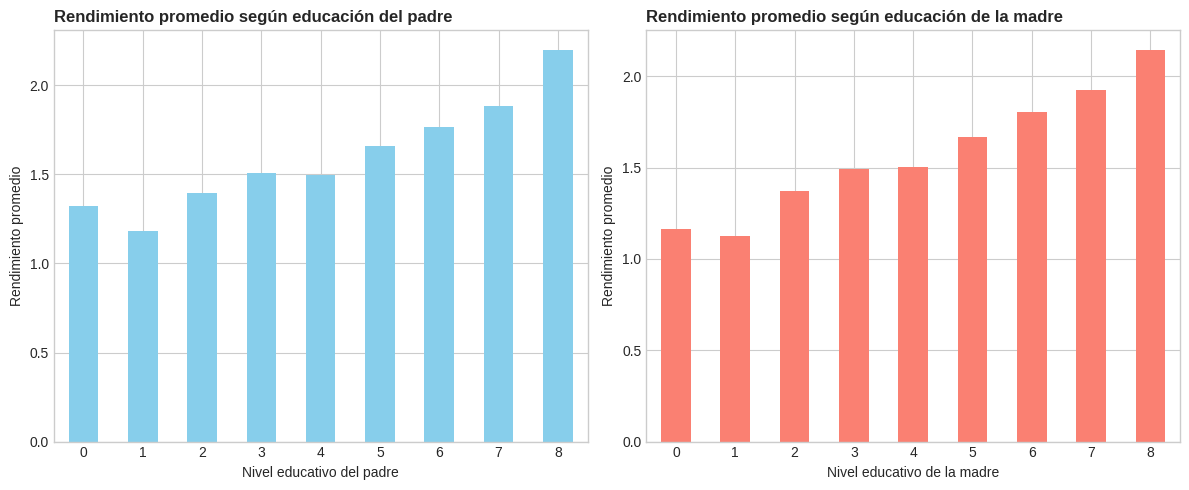

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,5))

df.groupby('F_EDUCACIONPADRE_NUM')['RENDIMIENTO_GLOBAL'].mean().plot(
    kind='bar', color='skyblue', ax=axes[0]
)
axes[0].set_title('Rendimiento promedio según educación del padre', loc='left', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nivel educativo del padre')
axes[0].set_ylabel('Rendimiento promedio')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

df.groupby('F_EDUCACIONMADRE_NUM')['RENDIMIENTO_GLOBAL'].mean().plot(
    kind='bar', color='salmon', ax=axes[1]
)
axes[1].set_title('Rendimiento promedio según educación de la madre', loc='left', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Nivel educativo de la madre')
axes[1].set_ylabel('Rendimiento promedio')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


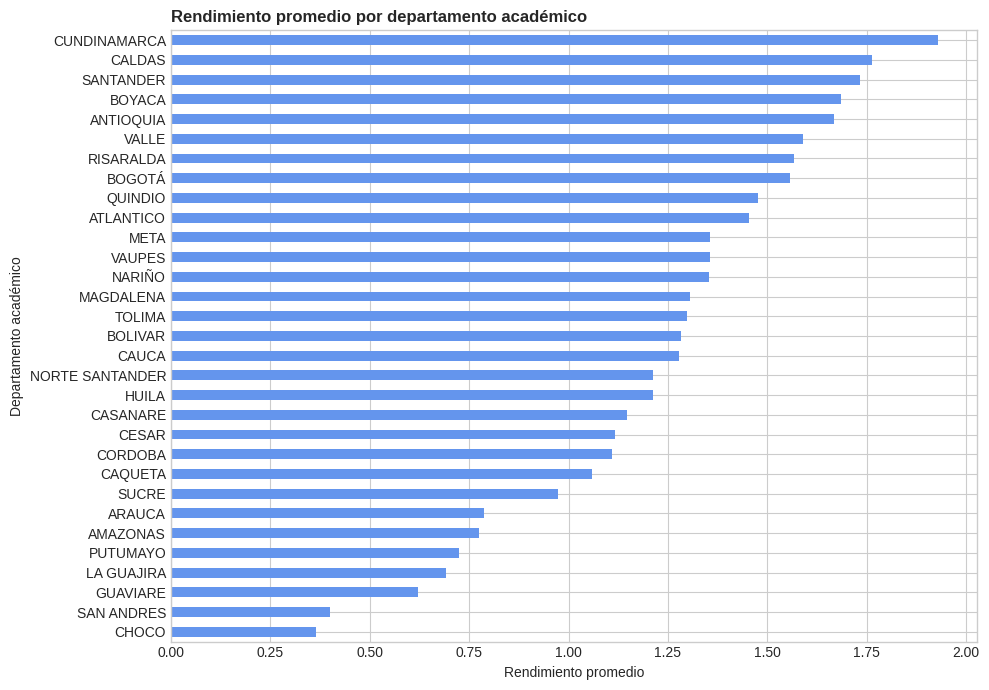

In [80]:
rendimiento_departamento = (
    df.groupby('E_PRGM_DEPARTAMENTO')['RENDIMIENTO_GLOBAL'].mean().sort_values(ascending=False))

plt.figure(figsize=(10,7))
rendimiento_departamento.plot(kind='barh', color='cornflowerblue')

plt.title('Rendimiento promedio por departamento académico', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Rendimiento promedio')
plt.ylabel('Departamento académico')
plt.gca().invert_yaxis()  # Muestra el más alto arriba
plt.tight_layout()
plt.show()

In [85]:
map_pago = {'No':0,'Si':1}
df['E_PAGOMATRICULAPROPIO_NUM'] = df['E_PAGOMATRICULAPROPIO'].map(map_pago).fillna(0).astype(int)
df['E_PAGOMATRICULAPROPIO_NUM'].unique()


array([0, 1])

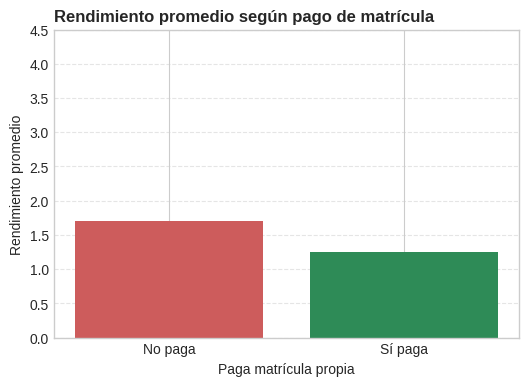

In [89]:
promedios = df.groupby('E_PAGOMATRICULAPROPIO_NUM')['RENDIMIENTO_GLOBAL'].mean()

# Plot
plt.figure(figsize=(6,4))
plt.bar(['No paga', 'Sí paga'], promedios, color=['indianred', 'seagreen'])
plt.title('Rendimiento promedio según pago de matrícula', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Paga matrícula propia')
plt.ylabel('Rendimiento promedio')
plt.ylim(0, 4.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()